<a href="https://colab.research.google.com/github/PBhat07/ML_Practice/blob/main/Audio2Mesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Aug 12 17:04:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/Audio2Mesh

/content/drive/MyDrive/Audio2Mesh


In [ ]:
!rm com_videos

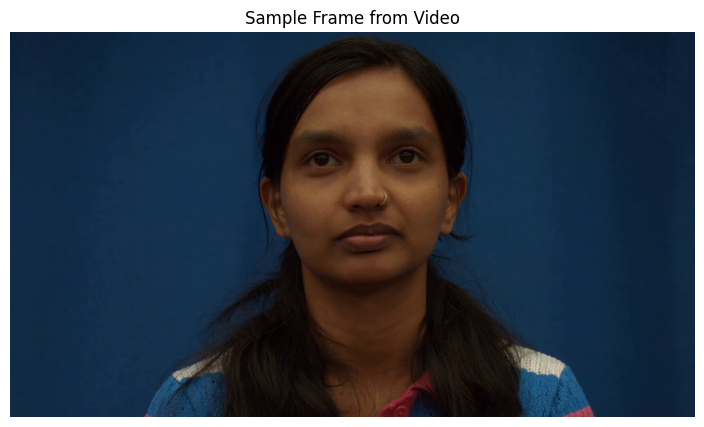

In [ ]:
import cv2
import matplotlib.pyplot as plt

def view_sample_frame(video_chunk):
    cap = cv2.VideoCapture(video_chunk)

    # Read the first frame
    success, image = cap.read()

    if success:
        # Display the first frame
        plt.figure(figsize=(10, 5))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Sample Frame from Video")
        plt.axis("off")
        plt.show()
    else:
        print("Failed to read the video chunk.")

    cap.release()

# Example usage
video_chunk = "/content/drive/MyDrive/Audio2Mesh/video_chunks/chunk_0_30.mov"
view_sample_frame(video_chunk)


In [ ]:
!touch conv_LSTM_transformer.py

In [ ]:
!touch train_trans.py

In [ ]:
!touch load_data.py

In [ ]:
!touch conv_LSTM.py

In [ ]:
!touch save_processed_data.py

In [ ]:
!touch Audio2Pose.py

In [ ]:
!chmod +x setup.sh

In [ ]:
!./setup.sh

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6

In [ ]:
!pip install transformer

ERROR: Could not find a version that satisfies the requirement transformer (from versions: none)
ERROR: No matching distribution found for transformer


In [ ]:
!python audio2vec.py

In [ ]:
!python save_processed_data.py

Saved audio features to audio_features.pt with shape: torch.Size([53, 1, 1901, 2048])
Saved video meshes to video_meshes.pt with shape: torch.Size([53, 600, 468, 3])


In [ ]:
!python train_trans.py

Resuming training from checkpoint: /content/drive/MyDrive/Audio2Mesh/best_audio_to_mesh_model_50.pth
Resumed training from epoch 50
Input shape before ResNet: torch.Size([4, 600, 2048, 1])
Traceback (most recent call last):
  File "/content/drive/MyDrive/Audio2Mesh/train_trans.py", line 138, in <module>
    train_model(train_loader, val_loader, model, criterion, optimizer, num_epochs=num_epochs)
  File "/content/drive/MyDrive/Audio2Mesh/train_trans.py", line 107, in train_model
    outputs = model(inputs)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1532, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1541, in _call_impl
    return forward_call(*args, **kwargs)
  File "/content/drive/MyDrive/Audio2Mesh/conv_LSTM_transformer.py", line 74, in forward
    features = self.feature_extractor(audio_input)
  File "/usr/local/lib/python3.10/dist-packages/torc

In [ ]:
# After the visualization, save the original and generated mesh offsets to .npy files
np.save('/content/drive/MyDrive/Audio2Mesh/Infer_samples/original_vertices.npy', np.array(original_vertices_list))
np.save('/content/drive/MyDrive/Audio2Mesh/Infer_samples/generated_mesh_offsets.npy', np.array(generated_vertices_list))
print("Original and generated mesh offsets saved.")


Original and generated mesh offsets saved.


In [ ]:
!pip install fastdtw

  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512614 sha256=2fdda98f82124a9865563793a481becfb2f7bcf81ba556cfecfd2c297f64ec99
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
!nvidia-smi

Mon Aug 12 16:54:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0              27W /  70W |  15039MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from conv_LSTM_transformer import AudioConditionedNetwork
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the saved tensors
audio_features = torch.load("/content/drive/MyDrive/Audio2Mesh/audio_features.pt").float()
video_meshes = torch.load("/content/drive/MyDrive/Audio2Mesh/video_meshes.pt").float()

# Ensure the data is on the correct device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
audio_features = audio_features.to(device)
video_meshes = video_meshes.to(device)

# Reshape audio features to remove the singleton dimension
audio_features = audio_features.squeeze(1)  # Shape: [53, 1901, 2048]

# Resample audio features to match the number of video frames
target_length = video_meshes.size(1)
audio_features = torch.nn.functional.interpolate(
    audio_features.permute(0, 2, 1), size=(target_length), mode='linear', align_corners=False
).permute(0, 2, 1)

# Ensure video meshes are of the correct shape
video_meshes = video_meshes.view(video_meshes.size(0), video_meshes.size(1), -1)  # Shape: [batch_size, frames, 1404]

# Create Dataset and DataLoader
dataset = TensorDataset(audio_features, video_meshes)
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Model initialization
input_size = audio_features.size(-1)
hidden_size = 512
output_size = video_meshes.size(-1)

model = AudioConditionedNetwork(input_size, hidden_size, output_size).to(device).float()

# Define losses and optimizer
reconstruction_loss = nn.MSELoss()
temporal_coherence_loss = nn.L1Loss()  # Temporal coherence penalty

optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001, weight_decay=0.01)

# Define the calculate_metrics function for validation
def calculate_metrics(loader, model):
    model.eval()
    total_loss = 0.0

    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)

            outputs = outputs.view(outputs.size(0), outputs.size(1), -1)  # Flatten outputs if needed
            targets = targets.view(targets.size(0), targets.size(1), -1)  # Flatten targets if needed

            # Calculate losses
            recon_loss = reconstruction_loss(outputs, targets)
            temporal_loss = temporal_coherence_loss(outputs[:, 1:], targets[:, :-1])  # Temporal coherence

            total_loss += (recon_loss + 0.1 * temporal_loss).item() * inputs.size(0)

    mse_loss = total_loss / len(loader.dataset)

    return mse_loss

# Load checkpoint if resuming training
resume_checkpoint_path = "/content/drive/MyDrive/Audio2Mesh/new_checkpoints/best_audio_to_mesh_model_2H50.PTH.pth"
start_epoch = 0
best_val_loss = float('inf')
num_epochs = 50  # Define the total number of epochs you want to train

if os.path.exists(resume_checkpoint_path):
    print(f"Resuming training from checkpoint: {resume_checkpoint_path}")
    checkpoint = torch.load(resume_checkpoint_path)

    if 'model_state_dict' in checkpoint and 'optimizer_state_dict' in checkpoint:
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        start_epoch = checkpoint['epoch'] + 1
        best_val_loss = checkpoint.get('best_val_loss', best_val_loss)
        print(f"Resumed training from epoch {start_epoch}")
    else:
        model.load_state_dict(checkpoint)  # Load model only if the checkpoint doesn't have other state info
        print("Checkpoint does not have optimizer state; resumed model only.")

# Define the training loop
def train_model(train_loader, val_loader, model, optimizer, num_epochs):
    global start_epoch

    # Initialize lists to store loss values
    training_losses = []
    validation_losses = []

    if start_epoch >= num_epochs:
        print(f"Training already completed up to epoch {start_epoch}. No further training required.")
        return

    for epoch in range(start_epoch, num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            outputs = outputs.view(outputs.size(0), outputs.size(1), -1)  # Flatten outputs if needed
            targets = targets.view(targets.size(0), targets.size(1), -1)  # Flatten targets if needed

            # Calculate losses
            recon_loss = reconstruction_loss(outputs, targets)
            temporal_loss = temporal_coherence_loss(outputs[:, 1:], targets[:, :-1])  # Temporal coherence

            total_loss = recon_loss + 0.1 * temporal_loss  # Weighted sum of losses

            # Backpropagate once for the accumulated loss
            total_loss.backward()
            optimizer.step()

            running_loss += total_loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch {epoch+1}, Training Loss: {epoch_loss:.4f}")
        training_losses.append(epoch_loss)

        val_loss = calculate_metrics(val_loader, model)
        print(f"Epoch {epoch+1}, Validation Loss: {val_loss:.4f}")
        validation_losses.append(val_loss)

    final_model_path = f"/content/drive/MyDrive/Audio2Mesh/new_checkpoints/best_audio_to_mesh_model_5ab{epoch+1}.pth"
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_val_loss': val_loss,
    }, final_model_path)
    print(f"Epoch {epoch+1} complete. Model saved as: {final_model_path}")

    print(f"Training complete. Final model saved as: {final_model_path}")

    # Print all logged training and validation losses
    print("Training and Validation Losses:")
    for i, (train_loss, val_loss) in enumerate(zip(training_losses, validation_losses), start=1):
        print(f"Epoch {i + start_epoch}: Training Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}")

    # Save logs to a file
    log_file_path = "/content/drive/MyDrive/Audio2Mesh/logs/training_logab5.txt"
    with open(log_file_path, 'w') as f:
        for i, (train_loss, val_loss) in enumerate(zip(training_losses, validation_losses), start=1):
            f.write(f"Epoch {i + start_epoch}: Training Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}\n")
    print(f"Training logs saved to {log_file_path}")

# Train the model
train_model(train_loader, val_loader, model, optimizer, num_epochs=num_epochs)

# Evaluate on the test set
test_loss = calculate_metrics(test_loader, model)
print(f"Test Loss: {test_loss:.4f}")

# Ensure the directory exists for saving inference samples
os.makedirs('/content/drive/MyDrive/Audio2Mesh/Infer_samples/', exist_ok=True)

def visualize_keypoints_grid(original_vertices_list, generated_vertices_list, normalize=False):
    """
    Visualize all frames in a grid layout with original vertices on top and generated vertices below.
    """
    def normalize_vertices(vertices):
        min_vals = vertices.min(axis=0)
        max_vals = vertices.max(axis=0)
        normalized_vertices = (vertices - min_vals) / (max_vals - min_vals)
        return normalized_vertices

    if normalize:
        original_vertices_list = [normalize_vertices(verts) for verts in original_vertices_list]
        generated_vertices_list = [normalize_vertices(verts) for verts in generated_vertices_list]

    num_frames = len(original_vertices_list)
    fig, axes = plt.subplots(2, num_frames, figsize=(60, 16), subplot_kw={'projection': '3d'})

    for i in range(num_frames):
        # Plot original vertices
        axes[0, i].scatter(original_vertices_list[i][:, 0], original_vertices_list[i][:, 1], original_vertices_list[i][:, 2], c='green', s=10)
        axes[0, i].set_title(f'Original Frame {i+1}')
        axes[0, i].set_xlabel('X')
        axes[0, i].set_ylabel('Y')
        axes[0, i].set_zlabel('Z')

        # Plot generated vertices
        axes[1, i].scatter(generated_vertices_list[i][:, 0], generated_vertices_list[i][:, 1], generated_vertices_list[i][:, 2], c='blue', s=10)
        axes[1, i].set_title(f'Generated Frame {i+1}')
        axes[1, i].set_xlabel('X')
        axes[1, i].set_ylabel('Y')
        axes[1, i].set_zlabel('Z')

    # Save the plot to a file
    output_file_path = "/content/drive/MyDrive/Audio2Mesh/Infer_samples/output_plot_grid_ab5.png"
    plt.savefig(output_file_path)
    print(f"Plot saved to {output_file_path}")
    plt.close(fig)  # Close the figure to free up memory


# Get the original and generated vertices for the first segment from the test set
model.eval()
with torch.no_grad():
    for audio_input, video_mesh in test_loader:
        audio_input = audio_input.to(device)
        predicted_mesh = model(audio_input).cpu().numpy()
        original_vertices = video_mesh.cpu().numpy()[0]  # Take the first batch
        generated_vertices = predicted_mesh[0]  # Take the first batch

        # Prepare lists to store vertices of sampled frames
        original_vertices_list = []
        generated_vertices_list = []

        # Collect all 30 frames for visualization
        for frame_index in range(30):
            original_vertices_list.append(original_vertices[frame_index].reshape(-1, 3))
            generated_vertices_list.append(generated_vertices[frame_index].reshape(-1, 3))

        # Visualize the frames in a grid
        visualize_keypoints_grid(original_vertices_list, generated_vertices_list, normalize=True)

        # Save the original and generated mesh offsets
        np.save('/content/drive/MyDrive/Audio2Mesh/Infer_samples/original_vertices.npy', np.array(original_vertices_list))
        np.save('/content/drive/MyDrive/Audio2Mesh/Infer_samples/generated_mesh_offsets.npy', np.array(generated_vertices_list))
        print("Original and generated mesh offsets saved.")

        break  # Stop after visualizing the first segment


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 220MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Streaming output truncated to the last 5000 lines.
Shape after FusionModule: torch.Size([1, 600, 512])
Shape after the Positional Encoding: torch.Size([1, 600, 512])
Shape after Attention module : torch.Size([1, 600, 512])
UNetDecoder input shape: torch.Size([1, 600, 512])
Output shape: torch.Size([1, 600, 1404])
Input shape before ResNet: torch.Size([1, 600, 2048, 1])
Shape after ResNet: torch.Size([600, 512])
Shape after reshaping back: torch.Size([1, 600, 512])
Shape after FusionModule: torch.Size([1, 600, 512])
Shape after the Positional Encoding: torch.Size([1, 600, 512])
Shape after Attention module : torch.Size([1, 600, 512])
UNetDecoder input shape: torch.Size([1, 600, 512])
Output shape: torch.Size([1, 600, 1404])
Input shape before ResNet: torch.Size([1, 600, 2048, 1])
Shape after ResNet: torch.Size([600, 512])
Shape after reshaping back: torch.Size([1, 600, 512])
Shape after FusionModule: torch.Size([1, 600, 512])
Shape after the Positional Encoding: torch.Size([1, 600, 512]

In [ ]:
!nvidia-smi

Mon Aug 12 16:56:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0              27W /  70W |  15039MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
torch.cuda.empty_cache()


In [ ]:
!nvidia-smi

Mon Aug 12 16:03:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0              26W /  70W |  15039MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import numpy as np
import cv2
import mediapipe as mp
import os

# Load the original and generated mesh offsets
original_vertices = np.load('/content/drive/MyDrive/Audio2Mesh/Infer_samples/original_vertices.npy')
generated_mesh_offsets = np.load('/content/drive/MyDrive/Audio2Mesh/Infer_samples/generated_mesh_offsets.npy')

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True)

# Define the face indices (landmarks) if you have saved them previously
faces = np.load('/content/drive/MyDrive/Audio2Mesh/faces.npy')

# Ensure the directory exists for saving images
output_dir = '/content/drive/MyDrive/Audio2Mesh/Face_Mesh_Images/'
os.makedirs(output_dir, exist_ok=True)

def draw_face_mesh_on_image(image, landmarks, faces, color=(0, 255, 0)):
    """
    Draws a face mesh on the given image using the provided landmarks and face connections.
    """
    for connection in mp_face_mesh.FACEMESH_TESSELATION:
        start_idx = connection[0]
        end_idx = connection[1]
        start_point = (int(landmarks[start_idx][0]), int(landmarks[start_idx][1]))
        end_point = (int(landmarks[end_idx][0]), int(landmarks[end_idx][1]))
        cv2.line(image, start_point, end_point, color, 1)
    return image

# Function to save face meshes
def save_face_mesh_images(vertices_list, prefix):
    for i, vertices in enumerate(vertices_list):
        # Assume that vertices are normalized and need to be scaled to the image size
        ih, iw = 480, 640  # You can adjust this to match your original image resolution
        scaled_vertices = vertices * np.array([iw, ih, 1])

        # Create an empty image
        image = np.zeros((ih, iw, 3), dtype=np.uint8)

        # Draw the face mesh on the image
        image = draw_face_mesh_on_image(image, scaled_vertices, faces)

        # Save the image
        output_file_path = os.path.join(output_dir, f"{prefix}_frame_{i+1}.png")
        cv2.imwrite(output_file_path, image)
        print(f"Saved {prefix} face mesh image for frame {i+1} to {output_file_path}")

# Save original face meshes
save_face_mesh_images(original_vertices, 'original')

# Save generated face meshes
save_face_mesh_images(generated_mesh_offsets, 'generated')

print("Face mesh images saved successfully.")


ModuleNotFoundError: No module named 'mediapipe'

In [ ]:
#visualization
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the saved tensors
audio_features = torch.load("/content/drive/MyDrive/Audio2Mesh/audio_features.pt").float()
video_meshes = torch.load("/content/drive/MyDrive/Audio2Mesh/video_meshes.pt").float()

# Ensure the data is on the correct device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
audio_features = audio_features.to(device)
video_meshes = video_meshes.to(device)

# Reshape audio features to remove the singleton dimension
audio_features = audio_features.squeeze(1)

# Resample audio features to match the number of video frames
target_length = video_meshes.size(1)
audio_features = torch.nn.functional.interpolate(
    audio_features.permute(0, 2, 1), size=(target_length), mode='linear', align_corners=False
).permute(0, 2, 1)

# Flatten or reshape video_meshes to match the model's expected output
video_meshes_cropped = video_meshes.view(video_meshes.size(0), video_meshes.size(1), -1)

# Create Dataset and DataLoader
dataset = TensorDataset(audio_features, video_meshes_cropped)
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Load your model
from conv_LSTM_transformer import AudioConditionedNetwork
input_size = audio_features.size(-1)
hidden_size = 512
output_size = video_meshes_cropped.size(-1)

model = AudioConditionedNetwork(input_size, hidden_size, output_size).to(device).float()

# Load the best model checkpoint
checkpoint_path = "/content/drive/MyDrive/Audio2Mesh/best_audio_to_mesh_model_100.pth"
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# Get the original and generated vertices for one frame in the test data
with torch.no_grad():
    for batch_idx, (audio_input, original_vertices) in enumerate(test_loader):
        audio_input = audio_input.to(device)
        generated_mesh = model(audio_input).cpu().numpy()  # Save as predicted_meshes
        generated_vertices = generated_mesh[0]  # Take the first batch

        # Reshape to get the frame vertices
        original_vertices = original_vertices.cpu().numpy().reshape(-1, 3)
        generated_vertices = generated_vertices.reshape(-1, 3)

        break  # We only need the first batch for visualization

# Visualization
def visualize_vertices(original_vertices, generated_vertices):
    fig = plt.figure(figsize=(12, 6))

    # Plot original vertices
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(original_vertices[:, 0], original_vertices[:, 1], original_vertices[:, 2], c='green', s=10)
    ax1.set_title('Original Face Keypoints')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

    # Plot generated vertices
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(generated_vertices[:, 0], generated_vertices[:, 1], generated_vertices[:, 2], c='blue', s=10)
    ax2.set_title('Generated Face Keypoints')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

    plt.show()

# Call the visualization function
visualize_vertices(original_vertices, generated_vertices)


OutOfMemoryError: CUDA out of memory. Tried to allocate 788.00 MiB. GPU 

In [ ]:
torch.cuda.empty_cache()


In [ ]:
torch.cuda.empty_cache()


In [ ]:
!nvidia-smi


Sat Aug  3 11:37:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0              30W /  70W |   5369MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Create directories
!mkdir -p /content/drive/MyDrive/Audio2Mesh/comparison_videos
!mkdir -p /content/drive/MyDrive/Audio2Mesh/test_frames

In [ ]:
# Change directory to your working directory in Google Drive
%cd /content/drive/MyDrive/Audio2Mesh

# Install dependencies
!pip install torch torchvision torchaudio
!pip install opencv-python-headless
!pip install imageio[ffmpeg]
!pip install moviepy
!pip install face-alignment
!pip install scikit-image==0.18.3  # Ensure the correct version of scikit-image is installed
!pip install pyyaml

!rm -rf first-order-model

# Clone the first-order-model repository into the working directory
!git clone https://github.com/alievk/first-order-model.git first-order-model

# Fix ImportError for skimage.util.pad in augmentation.py
!sed -i 's/from skimage.util import pad/from numpy import pad/' first-order-model/augmentation.py

# Fix TypeError for yaml.load in demo.py
!sed -i 's/config = yaml.load(f)/config = yaml.load(f, Loader=yaml.FullLoader)/' first-order-model/demo.py

In [ ]:
!rm -r first-order-model/

In [ ]:
# Change directory to your working directory in Google Drive
%cd /content/drive/MyDrive/Audio2Mesh

# Install dependencies
!pip install torch torchvision torchaudio
!pip install opencv-python-headless
!pip install imageio[ffmpeg]
!pip install moviepy
!pip install face-alignment
!pip install scikit-image==0.18.3  # Ensure the correct version of scikit-image is installed
!pip install pyyaml
!pip install dlib
!pip install imutils
!pip install trimesh pyrender torch opencv-python-headless
!apt-get update
!apt-get install -y python-opengl
!apt-get install -y libglu1-mesa libgl1-mesa-glx
!pip install "pyglet<2" trimesh

/content/drive/MyDrive/Audio2Mesh
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nv

In [ ]:
!pip install trimesh pyrender torch opencv-python-headless


In [ ]:
!pip install pyrender PyOpenGL PyOpenGL_accelerate


In [ ]:
import os
import cv2
import torch
import numpy as np
import moviepy.editor as mpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn.functional as F

from conv_LSTM_transformer import AudioConditionedNetwork  # Import your model definition

# Load preprocessed data
audio_features = torch.load("/content/drive/MyDrive/Audio2Mesh/audio_features.pt")
video_meshes = torch.load("/content/drive/MyDrive/Audio2Mesh/video_meshes.pt")

# Ensure the data is on the correct device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
audio_features = audio_features.to(device)
video_meshes = video_meshes.to(device)

# Define the model
input_size = 2048
hidden_size = 512
output_size = 900
model = AudioConditionedNetwork(input_size=input_size, hidden_size=hidden_size, output_size=output_size).to(device)
model.load_state_dict(torch.load("/content/drive/MyDrive/Audio2Mesh/best_audio_to_mesh_model.pth"))
model.eval()

def render_mesh(vertices, faces, image_size=(640, 480)):
    if np.any(faces >= vertices.shape[0]):
        print("Error: Max face index exceeds number of vertices.")
        return None
    fig = plt.figure(figsize=(image_size[0] / 100, image_size[1] / 100))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(vertices[faces], alpha=0.5, edgecolor='r')
    ax.add_collection3d(mesh)
    ax.set_xlim([np.min(vertices[:, 0]), np.max(vertices[:, 0])])
    ax.set_ylim([np.min(vertices[:, 1]), np.max(vertices[:, 1])])
    ax.set_zlim([np.min(vertices[:, 2]), np.max(vertices[:, 2])])
    plt.axis('off')
    plt.close(fig)
    return fig

def visualize_facial_landmarks(frame, landmarks):
    """Plot facial landmarks on the frame."""
    plt.imshow(frame)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.show()

def process_and_visualize(test_loader, model, device):
    for audio_input in test_loader:
        audio_input = audio_input.to(device)
        with torch.no_grad():
            predicted_meshes = model(audio_input).cpu().numpy()  # Shape (batch_size, num_vertices, 3)
        # Assuming landmarks are part of the mesh vertices
        landmarks_indices = [10, 200, 450]  # Indices of landmarks in the mesh
        landmarks = predicted_meshes[:, landmarks_indices, :]  # Extract landmarks
        for i in range(predicted_meshes.shape[0]):
            mesh_image = render_mesh(predicted_meshes[i], some_faces_array)  # Render the mesh as an image
            visualize_facial_landmarks(mesh_image, landmarks[i])

# Load data and run visualization
test_dataset = TensorDataset(audio_features, video_meshes)  # Assuming shapes are correctly aligned
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
process_and_visualize(test_loader, model, device)


AttributeError: 'list' object has no attribute 'to'

In [ ]:
!pwd

/content/drive/MyDrive/Audio2Mesh


In [ ]:
!touch conv_LSTM_3DMESH.py

In [ ]:
!apt-get update
!apt-get install -y python-opengl
!apt-get install -y libglu1-mesa libgl1-mesa-glx
!pip install "pyglet<2" trimesh


In [ ]:
!rm -r comparison_videos

In [ ]:
!mkdir comparison_videos

Manual identification of landmark indices

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import DataLoader, TensorDataset, random_split

from conv_LSTM_transformer import AudioConditionedNetwork  # Import your model definition

# Load preprocessed data (replace these paths with your actual file paths)
audio_features = torch.load("/content/drive/MyDrive/Audio2Mesh/audio_features.pt")
video_meshes = torch.load("/content/drive/MyDrive/Audio2Mesh/video_meshes.pt")

# Ensure the data is on the correct device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
audio_features = audio_features.to(device)
video_meshes = video_meshes.to(device)

# Create Dataset and DataLoader
dataset = TensorDataset(audio_features, video_meshes)
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Define the model
input_size = 2048
hidden_size = 512
output_size = 900
model = AudioConditionedNetwork(input_size=input_size, hidden_size=hidden_size, output_size=output_size).to(device)
model.load_state_dict(torch.load("/content/drive/MyDrive/Audio2Mesh/best_audio_to_mesh_model.pth"))
model.eval()

# Function to visualize 3D mesh
def visualize_3d_mesh(mesh, title="3D Mesh"):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(mesh[:, 0], mesh[:, 1], mesh[:, 2], c='b', marker='o')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Function to store and print landmark indices
def add_landmark_indices(feature, indices, landmark_indices):
    if feature in landmark_indices:
        landmark_indices[feature].extend(indices)
    else:
        landmark_indices[feature] = indices

    print(f"Current indices for {feature}: {landmark_indices[feature]}")
    return landmark_indices

# Dictionary to store identified landmark indices
landmark_indices = {}

# Iterate through frames and allow manual identification of landmarks
for batch_idx, (audio_features, video_meshes) in enumerate(test_loader):
    audio_features = audio_features.to(device)
    with torch.no_grad():
        predicted_meshes = model(audio_features).cpu().numpy()

    for idx in range(audio_features.size(0)):
        mesh_offsets = predicted_meshes[idx]
        base_mesh = video_meshes[idx].reshape(-1, 3)

        final_mesh = base_mesh + mesh_offsets

        # Visualize the mesh for this frame
        visualize_3d_mesh(final_mesh, title=f"Frame {idx}")

        # Pause for manual inspection and input
        print("Manually inspect the mesh and identify landmark indices.")
        lips_indices = input("Enter the indices for lips (comma separated): ")
        eyes_indices = input("Enter the indices for eyes (comma separated): ")
        nose_indices = input("Enter the indices for nose (comma separated): ")
        head_shape_indices = input("Enter the indices for head shape (comma separated): ")

        # Add identified indices to the landmark_indices dictionary
        landmark_indices = add_landmark_indices('lips', list(map(int, lips_indices.split(','))), landmark_indices)
        landmark_indices = add_landmark_indices('eyes', list(map(int, eyes_indices.split(','))), landmark_indices)
        landmark_indices = add_landmark_indices('nose', list(map(int, nose_indices.split(','))), landmark_indices)
        landmark_indices = add_landmark_indices('head_shape', list(map(int, head_shape_indices.split(','))), landmark_indices)

    break  # Stop after the first segment for demonstration

print("Final landmark indices:", landmark_indices)


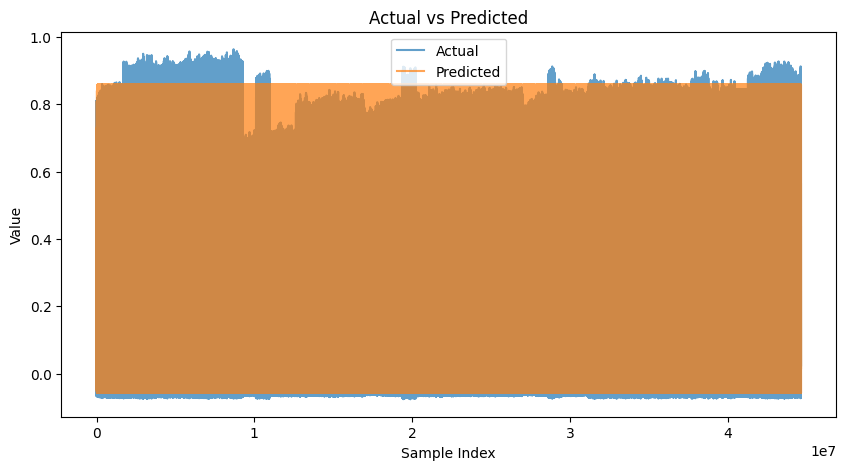

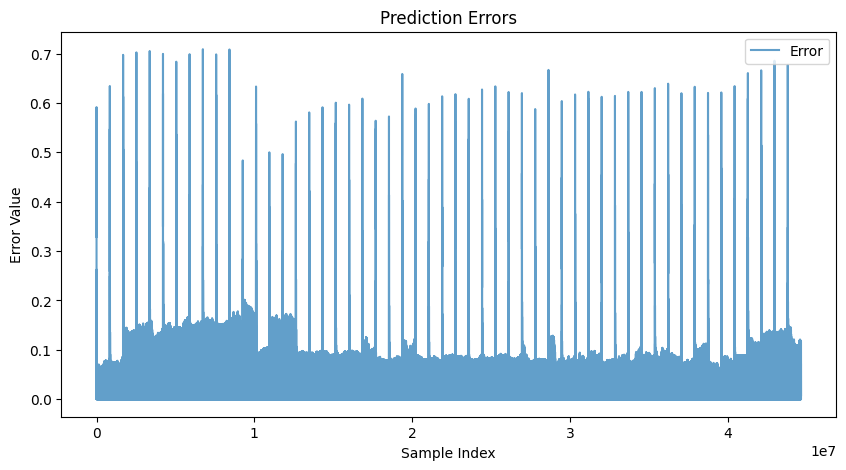

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from conv_LSTM import ConvLSTM  # Import the model definition

# Function to plot actual vs predicted values
def plot_predictions(model, loader, device):
    model.eval()
    actuals = []
    predictions = []
    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            actuals.append(targets.cpu().numpy())
            predictions.append(outputs.cpu().numpy())

    actuals = np.concatenate(actuals, axis=0)
    predictions = np.concatenate(predictions, axis=0)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(actuals.flatten(), label='Actual', alpha=0.7)
    plt.plot(predictions.flatten(), label='Predicted', alpha=0.7)
    plt.legend()
    plt.title('Actual vs Predicted')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.show()

    errors = np.abs(actuals.flatten() - predictions.flatten())
    plt.figure(figsize=(10, 5))
    plt.plot(errors, label='Error', alpha=0.7)
    plt.legend(loc='upper right')
    plt.title('Prediction Errors')
    plt.xlabel('Sample Index')
    plt.ylabel('Error Value')
    plt.show()


# Load the test dataset
def load_test_data(audio_features_path, video_meshes_path, batch_size, device):
    audio_features = torch.load(audio_features_path).float()
    video_meshes = torch.load(video_meshes_path).float()

    # Ensure the data is on the correct device
    audio_features = audio_features.to(device)
    video_meshes = video_meshes.to(device)

    # Reshape audio features to remove the singleton dimension
    audio_features = audio_features.squeeze(1)

    # Resample audio features to match the number of video frames
    target_length = video_meshes.size(1)
    audio_features = torch.nn.functional.interpolate(
        audio_features.permute(0, 2, 1), size=(target_length), mode='linear', align_corners=False
    ).permute(0, 2, 1)

    # Flatten video meshes to be compatible with fully connected layers
    video_meshes = video_meshes.view(video_meshes.size(0), video_meshes.size(1), -1)

    # Create Dataset and DataLoader
    dataset = TensorDataset(audio_features, video_meshes)
    test_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    return test_loader

# Main script to load the model and visualize predictions
if __name__ == "__main__":
    # Device configuration
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Paths to the saved model and test data
    model_path = "/content/drive/MyDrive/Audio2Mesh/best_audio_to_mesh_model.pth"
    audio_features_path = "/content/drive/MyDrive/Audio2Mesh/audio_features.pt"
    video_meshes_path = "/content/drive/MyDrive/Audio2Mesh/video_meshes.pt"
    batch_size = 16  # Set an appropriate batch size for your GPU

    # Define the model architecture
    input_size = 2048  # Adjust based on your input features
    hidden_size = 512
    output_size = 1404  # This should match the output size during training, here 1404 is used as example

    model = ConvLSTM(input_size, hidden_size, output_size).to(device)

    # Load the trained model weights
    model.load_state_dict(torch.load(model_path))

    # Load the test data
    test_loader = load_test_data(audio_features_path, video_meshes_path, batch_size, device)

    # Plot predictions on test set
    plot_predictions(model, test_loader, device)


In [ ]:
!touch visualize_mesh.py

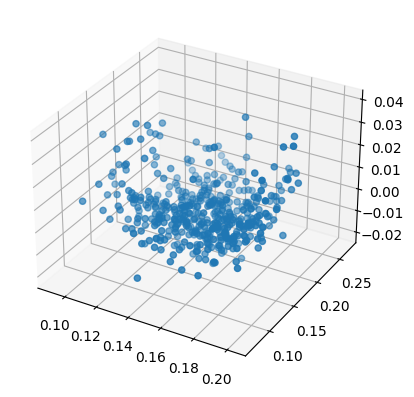

In [ ]:
import torch
import torchaudio
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from conv_LSTM import ConvLSTM  # Import the model definition

# Define the model architecture
input_size = 2048  # Adjust based on your input features
hidden_size = 512
output_size = 1404  # This should match the output size during training

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ConvLSTM(input_size, hidden_size, output_size).to(device)
model.load_state_dict(torch.load("/content/drive/MyDrive/Audio2Mesh/best_audio_to_mesh_model.pth"))
model.eval()

# Process the new audio file
def process_audio(audio_path, target_length=2048):
    waveform, sample_rate = torchaudio.load(audio_path)

    # Convert to mono if necessary
    if waveform.shape[0] == 2:
        waveform = torch.mean(waveform, dim=0, keepdim=True)

    if sample_rate != 16000:
        waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(waveform)

    # Ensure the waveform tensor has the correct shape
    waveform = waveform.squeeze(0)  # Remove the channel dimension if present

    # Pad or truncate the waveform to match the target length
    if waveform.size(0) < target_length:
        pad_size = target_length - waveform.size(0)
        waveform = torch.nn.functional.pad(waveform, (0, pad_size))
    else:
        waveform = waveform[:target_length]

    # Repeat the waveform to match the input_size
    waveform = waveform.unsqueeze(0).repeat(input_size, 1).unsqueeze(0).to(device)

    return waveform

# Example of processing a new audio file
audio_path = "/content/drive/MyDrive/Audio2Mesh/audio_chunks/chunk_0_30.wav"
audio_features = process_audio(audio_path)

# Ensure audio_features has the correct shape for the model
if audio_features.dim() == 2:  # If the tensor has only 2 dimensions (batch_size, sequence_length)
    audio_features = audio_features.unsqueeze(1)  # Add the input_size dimension

# Generate mesh offsets from audio
with torch.no_grad():
    audio_features = audio_features.permute(0, 2, 1)  # Ensure the shape matches (batch_size, sequence_length, input_size)
    mesh_offsets = model(audio_features)

    # Ensure the output is reshaped correctly
    batch_size = mesh_offsets.size(0)
    sequence_length = mesh_offsets.size(1)
    mesh_offsets = mesh_offsets.view(batch_size, sequence_length, 468, 3)  # Reshape to (batch_size, num_frames, num_landmarks, 3)

# Visualize the 3D mesh
def visualize_mesh(mesh):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Assuming mesh is of shape (num_landmarks, 3)
    xs = mesh[:, 0]
    ys = mesh[:, 1]
    zs = mesh[:, 2]

    ax.scatter(xs, ys, zs)
    plt.show()

# Visualize the first frame as an example
first_frame_mesh = mesh_offsets[0, 0].cpu().numpy()  # Extract the first frame's mesh
visualize_mesh(first_frame_mesh)


In [ ]:
!python generate_seq.py

2024-07-21 21:51:35.861951: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-21 21:51:35.862009: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-21 21:51:36.014150: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-21 21:51:36.293619: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-21 21:51:39.251736: W tensorflow/comp

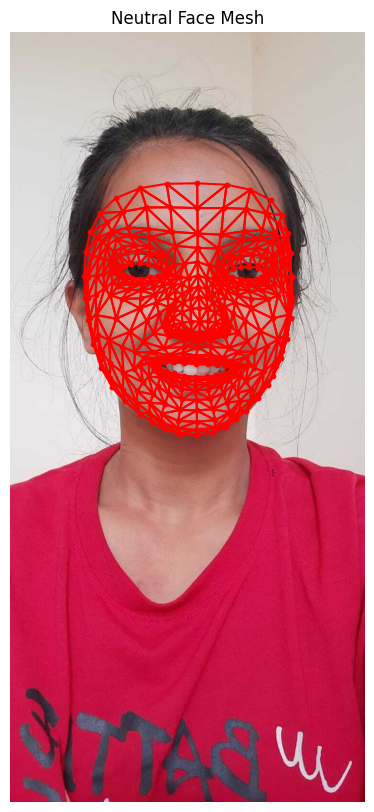

In [ ]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True)

# Define the connections for the face mesh
FACE_CONNECTIONS = mp_face_mesh.FACEMESH_TESSELATION

def get_neutral_mesh(reference_image_path):
    # Load the reference image
    image = cv2.imread(reference_image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform face mesh detection
    results = face_mesh.process(image_rgb)
    if not results.multi_face_landmarks:
        raise ValueError("No face detected in the reference image.")

    # Extract the landmarks
    landmarks = results.multi_face_landmarks[0]
    neutral_mesh = np.array([(lm.x, lm.y, lm.z) for lm in landmarks.landmark])

    # Trim the neutral mesh to the first 468 vertices
    neutral_mesh = neutral_mesh[:468]

    # Ensure the mesh matches the expected size
    if neutral_mesh.size != 1404:
        raise ValueError(f"Expected neutral_mesh to have size 1404, but got {neutral_mesh.size}")

    return neutral_mesh

def visualize_face_mesh(image, mesh, connections):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    for connection in connections:
        start_idx, end_idx = connection
        x_start, y_start = mesh[start_idx][:2]
        x_end, y_end = mesh[end_idx][:2]
        plt.plot([x_start * image.shape[1], x_end * image.shape[1]],
                 [y_start * image.shape[0], y_end * image.shape[0]], 'r-')
    plt.scatter(mesh[:, 0] * image.shape[1], mesh[:, 1] * image.shape[0], c='r', s=10)
    plt.title("Neutral Face Mesh")
    plt.axis('off')
    plt.show()

def main():
    reference_image_path = '/content/drive/MyDrive/Audio2Mesh/Infer_samples/WhatsApp Image 2024-06-24 at 1.46.00 PM.jpg'

    # Get the neutral mesh
    neutral_mesh = get_neutral_mesh(reference_image_path)

    # Load the reference image again for visualization
    image = cv2.imread(reference_image_path)

    # Visualize the face mesh
    visualize_face_mesh(image, neutral_mesh, FACE_CONNECTIONS)

if __name__ == "__main__":
    main()


In [ ]:
import os
import torch
import torchaudio
import numpy as np
from transformers import Wav2Vec2Processor, Wav2Vec2Model

# Load the processors and models
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
wav2vec_model_name = 'facebook/wav2vec2-large-960h-lv60-self'
emotion_model_name = 'audeering/wav2vec2-large-robust-12-ft-emotion-msp-dim'

audio_processor = Wav2Vec2Processor.from_pretrained(wav2vec_model_name)
emotion_processor = Wav2Vec2Processor.from_pretrained(emotion_model_name)
wav2vec_model = Wav2Vec2Model.from_pretrained(wav2vec_model_name).to(device)
emotion_model = Wav2Vec2Model.from_pretrained(emotion_model_name).to(device)

# Function to load and process audio
def load_and_process_audio(audio_path, processor):
    waveform, sample_rate = torchaudio.load(audio_path)
    # Convert to mono if necessary
    if waveform.shape[0] == 2:
        waveform = torch.mean(waveform, dim=0, keepdim=True)
    if sample_rate != 16000:
        waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(waveform)
    # Ensure the waveform tensor has the correct shape
    inputs = processor(waveform.squeeze(0), return_tensors="pt", sampling_rate=16000).input_values.to(device)
    return inputs

# Function to extract and concatenate features
def extract_and_concatenate_features(audio_path):
    audio_inputs = load_and_process_audio(audio_path, audio_processor)
    emotion_inputs = load_and_process_audio(audio_path, emotion_processor)

    with torch.no_grad():
        audio_features = wav2vec_model(audio_inputs).last_hidden_state
        emotion_features = emotion_model(emotion_inputs).last_hidden_state

    concatenated_features = torch.cat((audio_features, emotion_features), dim=-1)

    return audio_features, emotion_features, concatenated_features

# Path to the audio file
audio_path = "/content/drive/MyDrive/Audio2Mesh/audio_chunks/chunk_0_30.wav"  # Replace with your audio file path

# Extract features
audio_features, emotion_features, concatenated_features = extract_and_concatenate_features(audio_path)

# Print shapes and feature vectors
print("Wave2Vec2.0 Features Shape:", audio_features.shape)
print("Emotion Model Features Shape:", emotion_features.shape)
print("Concatenated Features Shape:", concatenated_features.shape)

# Convert to numpy for visualization
audio_features_np = audio_features.squeeze().cpu().numpy()
emotion_features_np = emotion_features.squeeze().cpu().numpy()
concatenated_features_np = concatenated_features.squeeze().cpu().numpy()

print("Wave2Vec2.0 Features:\n", audio_features_np)
print("Emotion Model Features:\n", emotion_features_np)
print("Concatenated Features:\n", concatenated_features_np)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/158 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/162 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/214 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-large-960h-lv60-self and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/661M [00:00<?, ?B/s]

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at audeering/wav2vec2-large-robust-12-ft-emotion-msp-dim and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Wave2Vec2.0 Features Shape: torch.Size([1, 1503, 1024])
Emotion Model Features Shape: torch.Size([1, 1503, 1024])
Concatenated Features Shape: torch.Size([1, 1503, 2048])
Wave2Vec2.0 Features:
 [[ 0.02247964 -0.12937984  0.17878239 ...  0.10077487 -0.04571248
   0.17854832]
 [ 0.02238623 -0.12938085  0.17871034 ...  0.10084237 -0.04578343
   0.17855024]
 [ 0.02234292 -0.12942898  0.17856409 ...  0.10087609 -0.04577798
   0.17855996]
 ...
 [ 0.00137791 -0.16497438  0.12189712 ...  0.14645527 -0.02544045
   0.202804  ]
 [-0.0313417  -0.1460629   0.17347375 ...  0.1450259  -0.01113639
   0.20269062]
 [ 0.05832548  0.01143795 -0.2103424  ... -0.10777352 -0.17239943
   0.20314644]]
Emotion Model Features:
 [[-0.00731105  0.00970994 -0.00416438 ...  0.00721763  0.00930074
   0.00946413]
 [-0.00741599  0.00743567 -0.00120916 ...  0.00673495  0.00887502
   0.00568176]
 [-0.00731367  0.00754828 -0.00533749 ...  0.0072732   0.00812348
   0.0074364 ]
 ...
 [-0.00702132  0.01031746 -0.00145236 ...

Input shape before ResNet: torch.Size([1, 1901, 2048, 1])
Shape after ResNet: torch.Size([1901, 512])
Shape after reshaping back: torch.Size([1, 1901, 512])
Shape after FusionModule: torch.Size([1, 1901, 512])
UNetDecoder input shape: torch.Size([1, 1901, 512])
Output shape: torch.Size([1, 1901, 900])
Vertices for batch 0:
[[ 0.31102514  0.5137907   0.00463458]
 [ 0.3019281   0.4987857  -0.02345064]
 [ 0.325544    0.43060774 -0.01793305]
 ...
 [ 0.5338753   0.4730339   0.0055584 ]
 [ 0.53066146  0.47473603  0.02730029]
 [ 0.6179775   0.4162784   0.04331464]]
Faces for batch 0:
[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


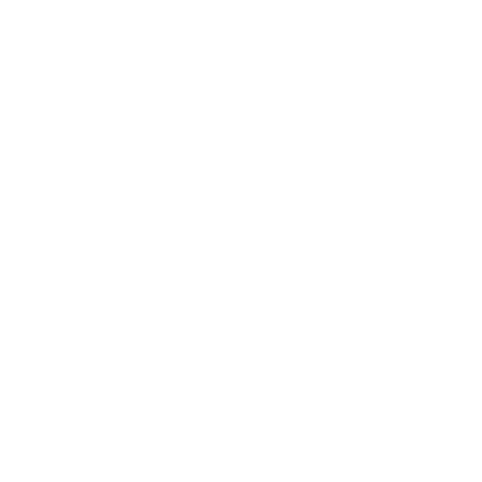

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from torch.utils.data import DataLoader, TensorDataset, random_split

# Load preprocessed data
audio_features = torch.load("/content/drive/MyDrive/Audio2Mesh/audio_features.pt")
video_meshes = torch.load("/content/drive/MyDrive/Audio2Mesh/video_meshes.pt")

# Ensure the data is on the correct device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
audio_features = audio_features.to(device)
video_meshes = video_meshes.to(device)

# Handle the shape and padding of audio features if needed
if audio_features.shape[1] == 1:
    audio_features = audio_features.squeeze(1)
if audio_features.shape[1] < 600:
    padding = 600 - audio_features.shape[1]
    audio_features = torch.nn.functional.pad(audio_features, (0, 0, 0, padding), mode='constant', value=0)

# Create Dataset and DataLoader with batch size of 1 to avoid memory issues
dataset = TensorDataset(audio_features, video_meshes)
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Define the model
from conv_LSTM_transformer import AudioConditionedNetwork  # Import your model definition
input_size = 2048
hidden_size = 512
output_size = 900
model = AudioConditionedNetwork(input_size=input_size, hidden_size=hidden_size, output_size=output_size).to(device)
model.load_state_dict(torch.load("/content/drive/MyDrive/Audio2Mesh/best_audio_to_mesh_model.pth"))
model.eval()

# Function to visualize 3D mesh
def render_mesh(vertices, faces):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    verts = [vertices[face] for face in faces]
    mesh = Poly3DCollection(verts, alpha=.25, linewidths=1, edgecolors='r')
    ax.add_collection3d(mesh)
    ax.set_xlim(vertices[:, 0].min(), vertices[:, 0].max())
    ax.set_ylim(vertices[:, 1].min(), vertices[:, 1].max())
    ax.set_zlim(vertices[:, 2].min(), vertices[:, 2].max())
    ax.view_init(30, 30)
    plt.axis('off')
    plt.show()

# Iterate over the test data to visualize the mesh
for batch_idx, (audio_features_batch, video_meshes_batch) in enumerate(test_loader):
    audio_features_batch = audio_features_batch.to(device)

    with torch.no_grad():
        predicted_meshes = model(audio_features_batch).cpu().numpy()

    # Visualize the first predicted mesh
    vertices = predicted_meshes[0].reshape(-1, 3)
    faces = video_meshes_batch[0].reshape(-1, 3).cpu().numpy().astype(np.int32)

    # Print the vertices and faces
    print(f"Vertices for batch {batch_idx}:")
    print(vertices)
    print(f"Faces for batch {batch_idx}:")
    print(faces)

    # Render the 3D mesh
    render_mesh(vertices, faces)

    # Stop after visualizing the first batch (for manual identification)
    break


Vertices for batch 0:
[[ 0.49437982  0.66405731 -0.04074001]
 [ 0.49182197  0.59513557 -0.06716326]
 [ 0.49200445  0.62029803 -0.03726862]
 ...
 [ 0.50707453  0.48300251 -0.00164085]
 [ 0.57412052  0.46106011  0.02641658]
 [ 0.58011287  0.45413163  0.0272582 ]]


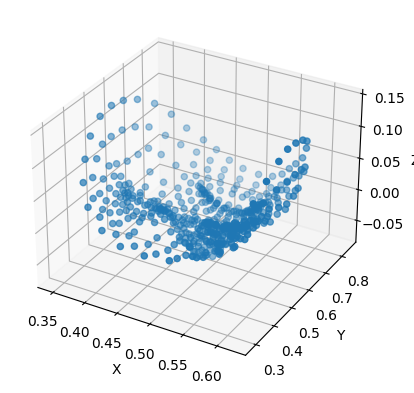

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_vertices(vertices):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Load a single batch for visualization
for batch_idx, (audio_features_batch, video_meshes_batch) in enumerate(test_loader):
    vertices = video_meshes_batch[0, 0].cpu().numpy()  # Take the first frame of the first batch
    print(f"Vertices for batch {batch_idx}:")
    print(vertices)

    visualize_vertices(vertices)

    break  # Just visualize the first batch


In [ ]:
# Assuming `video_meshes` is your tensor containing the mesh data and batch size is set to 1
batch_0_vertices = video_meshes[0].cpu().numpy()  # Get the vertices for batch 0


In [ ]:
print(f"Min values: {batch_0_vertices.min(axis=0)}")
print(f"Max values: {batch_0_vertices.max(axis=0)}")


Min values: [[ 0.47753665  0.61940151 -0.04456855]
 [ 0.47450602  0.54705572 -0.06928176]
 [ 0.47564602  0.57582581 -0.03919056]
 ...
 [ 0.49412465  0.4468298  -0.00663185]
 [ 0.56236017  0.42891195  0.01871566]
 [ 0.56874573  0.42097837  0.0192761 ]]
Max values: [[ 0.49884734  0.67120326 -0.03660843]
 [ 0.49740461  0.60014606 -0.06321419]
 [ 0.49749345  0.62452978 -0.03434788]
 ...
 [ 0.51497322  0.4823426   0.00155603]
 [ 0.58047283  0.45907637  0.02815127]
 [ 0.58690304  0.451112    0.02913231]]


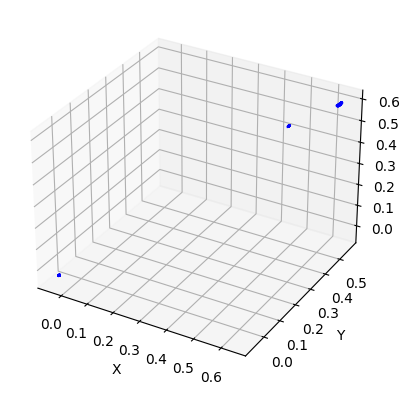

In [ ]:
subset_vertices = batch_0_vertices[:100]  # Visualize only the first 100 vertices
visualize_vertices(subset_vertices)


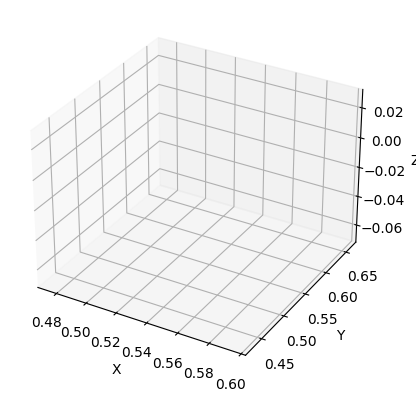

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_vertices(vertices):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot with adjusted point size and color
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='blue', s=10)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Set limits based on your data range
    ax.set_xlim([0.47, 0.60])  # Adjust these values to better fit your data range
    ax.set_ylim([0.42, 0.67])
    ax.set_zlim([-0.07, 0.03])

    plt.show()

# Visualize the vertices for batch 0
visualize_vertices(batch_0_vertices)


In [ ]:
# Generate a batch of outputs
with torch.no_grad():
    for batch_idx, (audio_features, video_meshes) in enumerate(test_loader):
        audio_features = audio_features.to(device)
        video_meshes = video_meshes.cpu().numpy()

        predicted_meshes = model(audio_features).cpu().numpy()
        print("Predicted Meshes Shape:", predicted_meshes.shape)
        print("Sample Predicted Meshes Data:", predicted_meshes[0])

        break  # Analyze the first batch only


Input shape before ResNet: torch.Size([1, 1901, 2048, 1])
Shape after ResNet: torch.Size([1901, 512])
Shape after reshaping back: torch.Size([1, 1901, 512])
Shape after FusionModule: torch.Size([1, 1901, 512])
UNetDecoder input shape: torch.Size([1, 1901, 512])
Output shape: torch.Size([1, 1901, 900])
Predicted Meshes Shape: (1, 1901, 900)
Sample Predicted Meshes Data: [[ 3.1102514e-01  5.1379073e-01  4.6345778e-03 ...  3.8168320e-01
   2.5024295e-01  3.8684346e-02]
 [ 4.2392176e-01  6.9217926e-01 -6.3668750e-04 ...  5.4611224e-01
   3.7306261e-01  4.1054368e-02]
 [ 4.6123454e-01  7.3446894e-01 -8.3351862e-03 ...  5.9671712e-01
   4.0720743e-01  4.2587973e-02]
 ...
 [ 4.8397273e-01  7.3908991e-01 -1.6723756e-02 ...  6.1797750e-01
   4.1627842e-01  4.3314639e-02]
 [ 4.8397273e-01  7.3908997e-01 -1.6723756e-02 ...  6.1797750e-01
   4.1627845e-01  4.3314647e-02]
 [ 4.8397276e-01  7.3908985e-01 -1.6723752e-02 ...  6.1797750e-01
   4.1627839e-01  4.3314643e-02]]


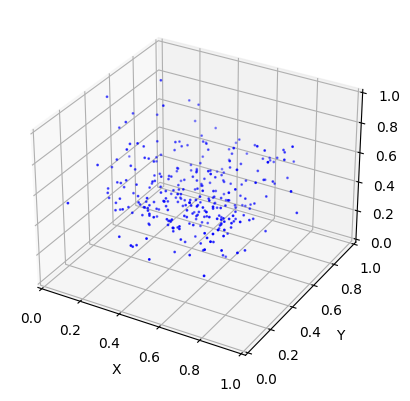

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def normalize_vertices(vertices):
    """
    Normalize the vertices to spread them over a unit cube.
    """
    min_vals = vertices.min(axis=0)
    max_vals = vertices.max(axis=0)
    normalized_vertices = (vertices - min_vals) / (max_vals - min_vals)
    return normalized_vertices

def visualize_vertices(vertices, normalize=False):
    """
    Visualize the vertices in a 3D plot.

    Parameters:
    - vertices: np.array, the vertices to visualize
    - normalize: bool, whether to normalize the vertices
    """
    if normalize:
        vertices = normalize_vertices(vertices)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='blue', s=1)

    # Optionally, set the plot limits if vertices are clustered in a small space
    ax.set_xlim(vertices[:, 0].min(), vertices[:, 0].max())
    ax.set_ylim(vertices[:, 1].min(), vertices[:, 1].max())
    ax.set_zlim(vertices[:, 2].min(), vertices[:, 2].max())

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Assuming the model output needs to be reshaped
predicted_meshes = predicted_meshes.reshape((1901, 300, 3))

# Visualize the first frame's vertices, with normalization
visualize_vertices(predicted_meshes[0], normalize=True)


Face indices saved to faces.npy


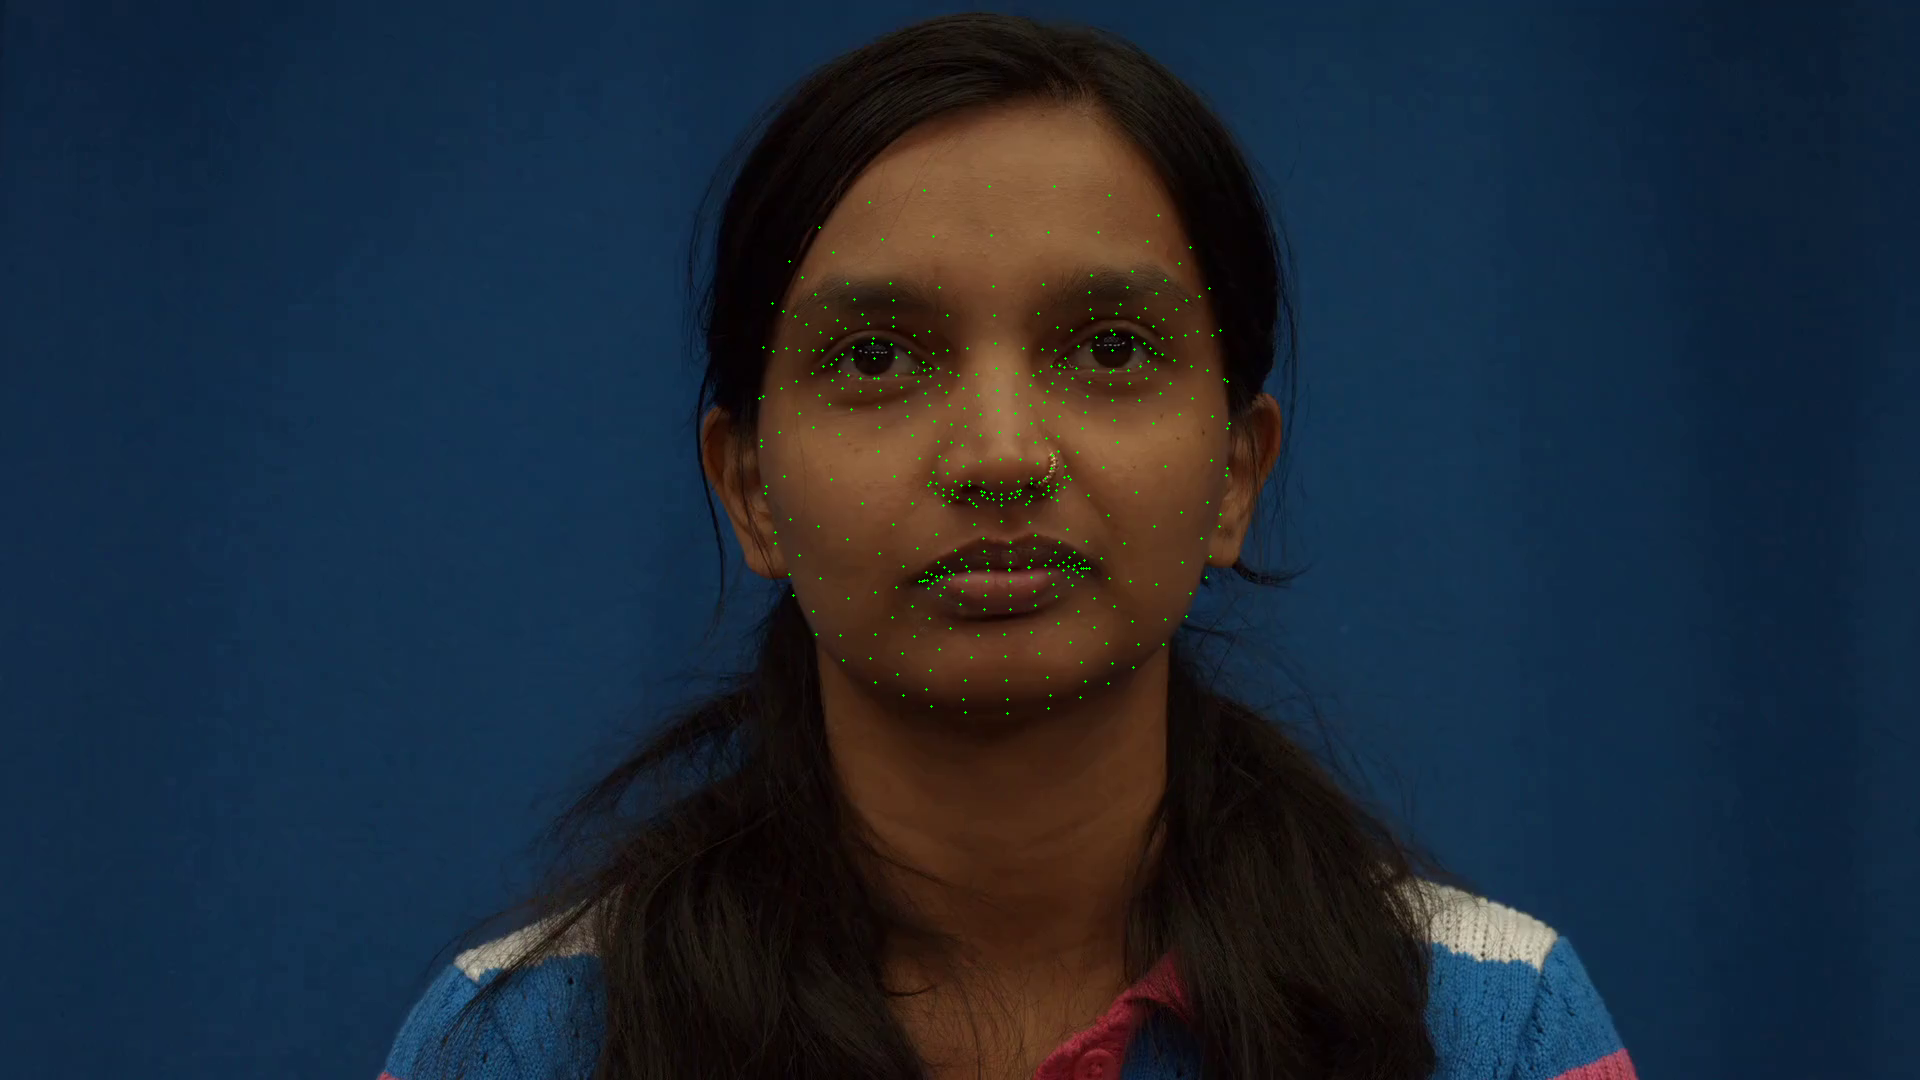

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, refine_landmarks=True)

# Path to your video segment
video_path = '/content/drive/MyDrive/Audio2Mesh/video_chunks/chunk_0_30.mov'
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Read the first frame of the video
ret, frame = cap.read()
if not ret:
    print("Error: Could not read frame.")
    cap.release()
    exit()

# Process the frame with MediaPipe
results = face_mesh.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        # Extract triangle connections from MediaPipe's landmark indices
        triangle_indices = mp_face_mesh.FACEMESH_TESSELATION
        faces = np.array([[landmark for landmark in connection] for connection in triangle_indices], dtype=np.int32)

        # Save the face indices
        np.save('/content/drive/MyDrive/Audio2Mesh/faces.npy', faces)
        print("Face indices saved to faces.npy")

else:
    print("No face landmarks detected in the first frame.")

# Release video capture
cap.release()

# Optional: Display the first frame with landmarks (for verification)
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        for id, landmark in enumerate(face_landmarks.landmark):
            ih, iw, _ = frame.shape
            x, y = int(landmark.x * iw), int(landmark.y * ih)
            cv2.circle(frame, (x, y), 1, (0, 255, 0), -1)

    cv2_imshow(frame)  # Use cv2_imshow() instead of cv2.imshow()


In [ ]:
import torch
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

# Load preprocessed data (assuming these files are available)
audio_features = torch.load("/content/drive/MyDrive/Audio2Mesh/audio_features.pt")
video_meshes = torch.load("/content/drive/MyDrive/Audio2Mesh/video_meshes.pt")

# Ensure the data is on the correct device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
audio_features = audio_features.to(device)
video_meshes = video_meshes.to(device)

# Load your model and set it to evaluation mode
from conv_LSTM_transformer import AudioConditionedNetwork  # Import your model definition

input_size = 2048
hidden_size = 512
output_size = 1404
model = AudioConditionedNetwork(input_size=input_size, hidden_size=hidden_size, output_size=output_size).to(device)

# Load the checkpoint and extract only the model state dict
checkpoint_path = "/content/drive/MyDrive/Audio2Mesh/best_audio_to_mesh_model_106.pth"
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['model_state_dict'])  # Load only the model parameters
model.eval()

# Create DataLoader with batch size 1 to prevent memory issues
test_dataset = TensorDataset(audio_features, video_meshes)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Get the predicted vertices for the first batch
predicted_meshes = None
with torch.no_grad():
    for batch_idx, (audio_input, _) in enumerate(test_loader):
        audio_input = audio_input.to(device)
        predicted_meshes = model(audio_input).cpu().numpy()  # Save as predicted_meshes
        predicted_vertices = predicted_meshes[0]  # Take the first frame
        break  # Stop after the first batch

# Save the predicted vertices to a file
np.save('/content/drive/MyDrive/Audio2Mesh/predicted_vertices.npy', predicted_vertices)

# Print the shape of predicted_meshes to understand its structure
print("Shape of predicted_meshes:", predicted_meshes.shape)


Input shape before ResNet: torch.Size([1, 1, 1901, 2048])
Shape after ResNet: torch.Size([1, 512])
Shape after reshaping back: torch.Size([1, 1, 512])
Shape after FusionModule: torch.Size([1, 1, 512])
UNetDecoder input shape: torch.Size([1, 1, 512])
Output shape: torch.Size([1, 1, 1404])
Shape of predicted_meshes: (1, 1, 1404)


In [ ]:
# Print the shape of predicted_meshes to understand its structure
print("Shape of predicted_meshes:", predicted_meshes.shape)


Shape of predicted_meshes: (1, 1, 1404)


Shape of original_keypoints: (2556, 2)
Sample data from original_keypoints: [[ 18  17]
 [ 82  38]
 [  8   9]
 [456 248]
 [167   2]]
Shape of predicted_meshes: (1, 1, 1404)


<ipython-input-47-3f5d37f565e3>:11: RuntimeWarning: invalid value encountered in divide
  normalized_vertices = (vertices - min_vals) / (max_vals - min_vals)


IndexError: index 2 is out of bounds for axis 1 with size 2

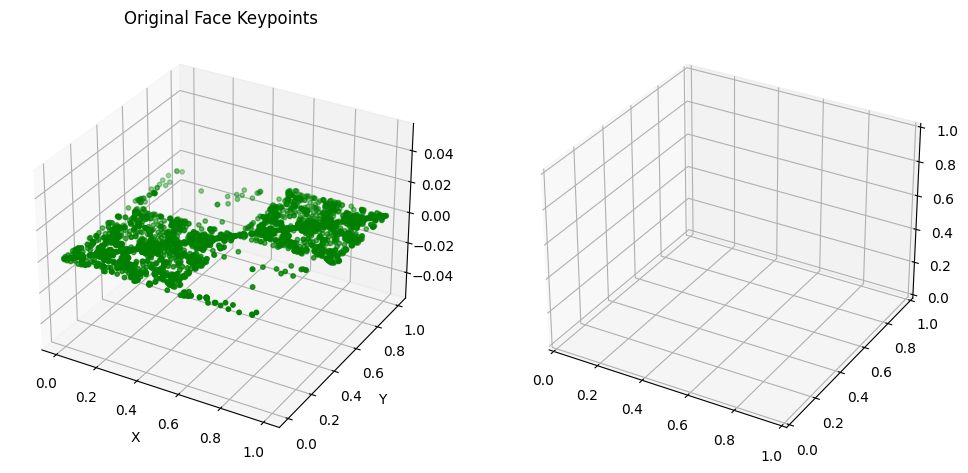

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def normalize_vertices(vertices):
    """
    Normalize the vertices to spread them over a unit cube.
    """
    min_vals = vertices.min(axis=0)
    max_vals = vertices.max(axis=0)
    normalized_vertices = (vertices - min_vals) / (max_vals - min_vals)
    return normalized_vertices

def visualize_keypoints(original_vertices, generated_vertices, normalize=False):
    """
    Visualize the original and generated keypoints in a 3D plot.

    Parameters:
    - original_vertices: np.array, the original vertices
    - generated_vertices: np.array, the generated vertices from the model
    - normalize: bool, whether to normalize the vertices
    """
    if normalize:
        original_vertices = normalize_vertices(original_vertices)
        generated_vertices = normalize_vertices(generated_vertices)

    fig = plt.figure(figsize=(12, 6))

    # Plot original vertices
    ax1 = fig.add_subplot(121, projection='3d')

    # Handle dimensionality mismatch
    if original_vertices.shape[1] == 2:
        ax1.scatter(original_vertices[:, 0], original_vertices[:, 1], c='green', s=10)
    else:
        ax1.scatter(original_vertices[:, 0], original_vertices[:, 1], original_vertices[:, 2], c='green', s=10)

    ax1.set_title('Original Face Keypoints')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    if original_vertices.shape[1] == 3:
        ax1.set_zlabel('Z')

    # Plot generated vertices
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(generated_vertices[:, 0], generated_vertices[:, 1], generated_vertices[:, 2], c='blue', s=10)
    ax2.set_title('Generated Face Keypoints')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

    plt.show()

# Load original face keypoints (from MediaPipe or other source)
original_keypoints = np.load('/content/drive/MyDrive/Audio2Mesh/faces.npy')  # Replace with correct file path

# Inspect the shape to understand how to reshape or subset the data
print("Shape of original_keypoints:", original_keypoints.shape)
print("Sample data from original_keypoints:", original_keypoints[:5])

# Assuming the predicted vertices are already loaded or computed
print("Shape of predicted_meshes:", predicted_meshes.shape)

# Adjust dimensionality if needed
if original_keypoints.shape[1] == 2:
    # Discard Z from generated keypoints or add a constant Z to original keypoints
    predicted_vertices = predicted_meshes[:, :, :2]  # Take only X and Y
else:
    predicted_vertices = predicted_meshes[:, :, :3]  # Ensure 3D

# Normalize and visualize the vertices side by side
visualize_keypoints(original_keypoints, predicted_vertices[0], normalize=True)


In [ ]:
if np.isnan(predicted_meshes).any() or np.isinf(predicted_meshes).any():
    print("Warning: NaN or Inf values detected in the model output.")


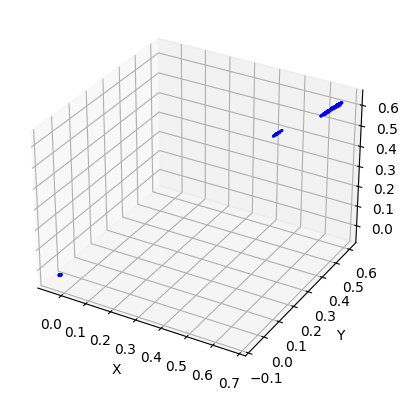

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_vertices(vertices):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='blue', s=1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Visualize the vertices of batch 0
visualize_vertices(batch_0_vertices)


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_vertices(vertices):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='blue', s=1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Visualize the vertices you printed earlier
visualize_vertices(np.array([
    [0.49437982, 0.66405731, -0.04074001],
    [0.49182197, 0.59513557, -0.06716326],
    [0.49200445, 0.62029803, -0.03726862],
    #... include other vertices
    [0.50707453, 0.48300251, -0.00164085],
    [0.57412052, 0.46106011, 0.02641658],
    [0.58011287, 0.45413163, 0.0272582]
]))

# Alternatively, use the entire vertices array if you've stored it as a variable
# visualize_vertices(vertices)
